In [93]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [94]:
datos= pd.read_csv('datosusdcop.csv')
datos

,Fecha,Último,Apertura,Máximo,Mínimo,Vol.,% var.
0,01.11.2022,"4.937,48","4.938,75","4.938,75","4.937,48",NaN,"0,16%"
1,31.10.2022,"4.929,35","4.835,00","4.946,33","4.829,75",NaN,"2,22%"
2,28.10.2022,"4.822,08","4.800,00","4.867,71","4.760,04",NaN,"0,73%"
3,27.10.2022,"4.787,08","4.884,06","4.889,98","4.792,79",NaN,"-1,73%"
4,26.10.2022,"4.871,14","4.975,20","4.989,34","4.873,38",NaN,"-1,86%"
...,...,...,...,...,...,...,...
212,07.01.2022,"4.051,06","4.034,51","4.059,98","4.024,01","1,03K","0,41%"
213,06.01.2022,"4.034,51","4.026,09","4.065,59","4.022,84","0,82K","0,22%"
214,05.01.2022,"4.025,50","4.080,20","4.080,20","4.014,00","0,76K","-1,34%"
215,04.01.2022,"4.080,20","4.070,00","4.091,50","4.065,93","0,66K","0,25%"


In [95]:
ultimo= datos.loc[:,'Último']
ul= ultimo.to_numpy()
for i in range(len(ul)):
  a=  ul[i].replace(".", "")
  a= a.replace(',','.')
  ul[i]= float(a)

In [96]:
ul= ul[::-1]

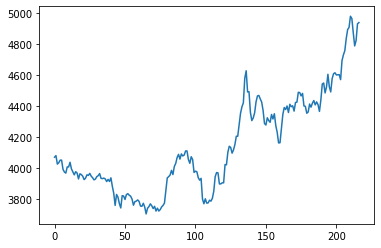

In [97]:
plt.plot(ul)
plt.show()

In [98]:
rend= [np.log(ul[i]/ul[i-1]) for i in range(1,len(ul))]
rend

[0.002503007367988189,
 -0.013496880064593295,
 0.0022357301673402883,
 0.004093718343369448,
 0.0,
 -0.014711267233350037,
 -0.004365837967639671,
 -0.0017905017557473806,
 0.009996747685816574,
 0.0,
 0.00744118941757933,
 -0.010665539280772669,
 -0.004856102308093057,
 -0.004685160320706108,
 0.005059931909357685,
 -0.002102044287565051,
 -0.00966056524631786,
 0.00836441166484786,
 -0.0012624638402856361,
 -0.0025879781045864783,
 -0.005657116502031971,
 0.00241714406308485,
 0.005428680343496586,
 -0.0009811632628395608,
 0.0032987491646961327,
 -0.004448034911459361,
 -0.0026097788893065473,
 -0.0034877854869365256,
 0.0012683052763447769,
 0.0040361401880486735,
 0.0015476448369989785,
 0.0033883391291745493,
 -0.00776135015393677,
 -0.0004424238797984888,
 0.0007626776455173954,
 -0.0012714527550038096,
 -0.004335071598233835,
 0.00357142325680407,
 -0.003433431597414359,
 0.0059766614951041195,
 -0.013810925888886176,
 -0.011656622968744357,
 -0.020683992966326524,
 0.01859740

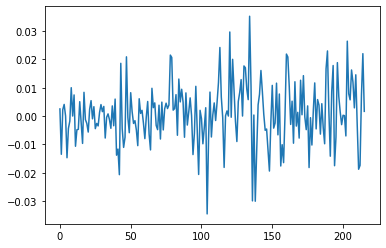

In [99]:
plt.plot(rend)
plt.show()

In [100]:
def MBEU(numTrayectorias, numPuntos):
  delta_t = 1/numPuntos
  mb = np.zeros((numTrayectorias, numPuntos+1))
  for i in range(numTrayectorias):
    for j in range(1, numPuntos+1):
      mb[i,j] = mb[i,j-1] + np.sqrt(delta_t) * np.random.normal(0, 1)
  return mb

In [101]:
def milstein(numTrayectorias, numPuntos,mb,s0, mu, sigma):
  delta_t = 1/numPuntos
  st= np.zeros((numTrayectorias,numPuntos+1))
  st[:,0]= s0

  for i in range(numTrayectorias):
    for j in range(1,numPuntos+1):
      st[i,j]= st[i,j-1] + mu*st[i,j-1]*delta_t +sigma*st[i,j-1]*(mb[i,j]-mb[i,j-1]) + (1/2)*(sigma**2)*st[i,j-1]*((mb[i,j]-mb[i,j-1])**2-delta_t)
  return st

In [102]:
def mediana(St, numTrayectorias):
    I = []
    for i in range(numTrayectorias):
        suma = 0
        for j in range(numTrayectorias):
            suma += np.linalg.norm(St[i,:]-St[j,:],np.inf)
        I.append(suma)
    index = np.argmin(I)
    new_s = St[index,:]
    return new_s

In [103]:
trayectorias= 10000
prediccion_dias=7
delta_t= 1/len(ul)
s0= ul[-1]
last= len(ul)-1
s0,last

(4937.48, 216)

In [104]:
mb= MBEU(trayectorias,prediccion_dias)

In [107]:
mu_es= np.mean(rend)/delta_t
sigma_est= np.sqrt(np.var(rend)/delta_t)
mu_es, sigma_est

(0.1941065805026014, 0.15482262083338827)

In [108]:
mu_est = mu_es - mu_es*0.5
mu_est

0.0970532902513007

In [109]:
estim_m= milstein(trayectorias, prediccion_dias, mb, s0, mu_est, sigma_est)

In [111]:
upper= []
for i in range(len(estim_m[0])):
  upper.append(np.percentile(estim_m[:,i], 97.5))
lower= []
for i in range(len(estim_m[0])):
  lower.append(np.percentile(estim_m[:,i], 2.5))

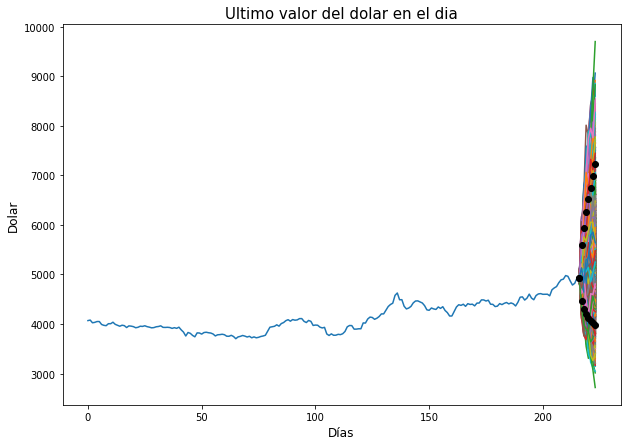

In [112]:
plt.figure(figsize=(10,7))
plt.plot(ul)

for Xi in estim_m:
    plt.plot(range(last, last+prediccion_dias+1), Xi)
    
plt.plot(range(last, last+prediccion_dias+1), upper, 'ok')
plt.plot(range(last, last+prediccion_dias+1), lower, 'ok')

plt.title('Ultimo valor del dolar en el dia', fontsize=15)
plt.xlabel('Días', fontsize=12)
plt.ylabel('Dolar', fontsize = 12)
plt.show()

In [113]:
means = []
for i in range(len(estim_m[0])):
    means.append(np.mean(estim_m[:, i]))
means[-1]

5421.944389215199

In [114]:
medians = mediana(estim_m, trayectorias)

In [115]:
medians[-1]

5310.268552801594

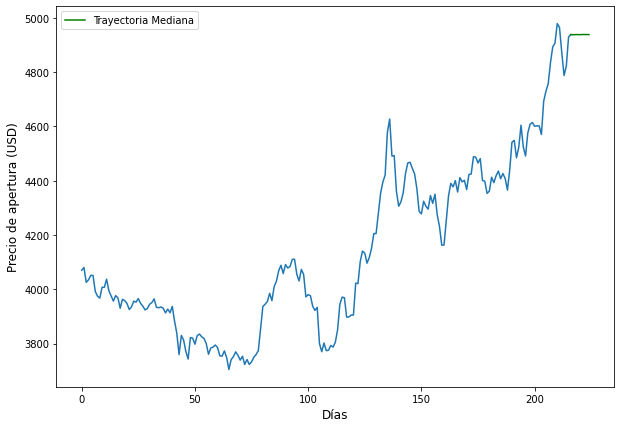

In [45]:
from __future__ import unicode_literals
upper2 = []
for i in range(len(estim_m[0])):
    upper2.append(np.percentile(estim_m[:,i], 60.5))

lower2 = []
for i in range(len(estim_m[0])):
    lower2.append(np.percentile(estim_m[:, i], 30.5))

plt.figure(figsize=(10,7))

plt.plot(ul)


#plt.plot(range(last, last+prediccion_dias+1), means, label='Trayectoria Media', color = 'r')
plt.plot(range(last, last+prediccion_dias+1), medians, label='Trayectoria Mediana', color = 'green')
#plt.plot(range(last, last+prediccion_dias+1), upper2, label = 'Banda Superior', color = 'black')

#plt.plot(range(last, last+prediccion_dias+1), lower2, label = 'Banda Inferior', color = 'black')

plt.xlabel('Días', fontsize=12)
plt.ylabel('Precio de apertura (USD)', fontsize = 12)
plt.legend()

plt.show()

In [46]:
print('El dolar dentro de 8 dias estara en',medians[-1]), ul[-1]

El dolar dentro de 8 dias estara en 4937.535632989163


(None, 4937.48)